In [1]:
# Importing necessary packages

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import gaussian_kde
import numpy as np
import seaborn as sns
import mlxtend
from mlxtend.plotting import heatmap
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import chi2_contingency
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import svm


C:\Users\aslam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<b> Importing Data and removing unwanted columns </b>

In [4]:

grid_ds1=pd.read_csv('Grid_Anonymized.csv')


if 'Unnamed: 0' in grid_ds1.columns:
    grid_ds1.drop('Unnamed: 0',axis=1,inplace=True)
if 'Study_name' in grid_ds1.columns:
    grid_ds1.drop('Study_name',axis=1,inplace=True)
    
numerical_cols = ['Age', 'Start', 'Duration', 'Parent_Stimulus_Start', 'Parent_Stimulus_Duration', 
                  'Hit_time_G', 'Time_spent_G', 'Time_spent_G_Percentage',  'Revisit_G_Revisits', 'TTFF_F', 
                  'Time_spent_F', 'Time_spent_F_Percentage', 'Revisit_F_Revisits', 'Fixations_Count', 'First_Fixation_Duration', 
                  'Average_Fixations_Duration', 'Mouse_Clicks']

grid_ds1.tail(5)

,Respondent_Name,Gender,Age,Group,Type,Label,Start,Duration,ParentStimulus,Parent_Stimulus_Start,...,TTFF_F,Time_spent_F,Time_spent_F_Percentage,Revisit_F_Revisitors,Revisit_F_Visitors,Revisit_F_Revisits,Fixations_Count,First_Fixation_Duration,Average_Fixations_Duration,Mouse_Clicks
15367,Med 2-3,MALE,0,Med 2,Static AOI,II-3 CompleteHeartBlock copy copy,353029,30127,Complete heart block,353029.0,...,27063.0,16.0,0.0,0.0,1.0,0.0,1.0,16.0,16.0,0.0
15368,Med 2-3,MALE,0,Med 2,Static AOI,II-4 CompleteHeartBlock copy copy copy,353029,30127,Complete heart block,353029.0,...,30119.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,0.0
15369,Med 2-3,MALE,0,Med 2,Static AOI,V5-2 CompleteHeartBlock,353029,30127,Complete heart block,353029.0,...,25561.0,349.0,1.0,1.0,1.0,3.0,8.0,16.0,44.0,0.0
15370,Med 2-3,MALE,0,Med 2,Static AOI,V5-3 CompleteHeartBlock,353029,30127,Complete heart block,353029.0,...,26763.0,384.0,1.0,1.0,1.0,3.0,12.0,17.0,32.0,0.0
15371,Med 2-3,MALE,0,Med 2,Static AOI,V5-4 CompleteHeartBlock,353029,30127,Complete heart block,353029.0,...,26730.0,317.0,1.0,1.0,1.0,3.0,11.0,16.0,29.0,0.0


In [5]:
# Shape of data
grid_ds1.shape

(15372, 28)

### Imputation (Before and After):

<span style="color:green; font-weight:bold">The distribution of data remains the same, the imputation of null data does not change the overall distribution</span>

#### Histogram of Time_Spent_G  by Group before Imputation

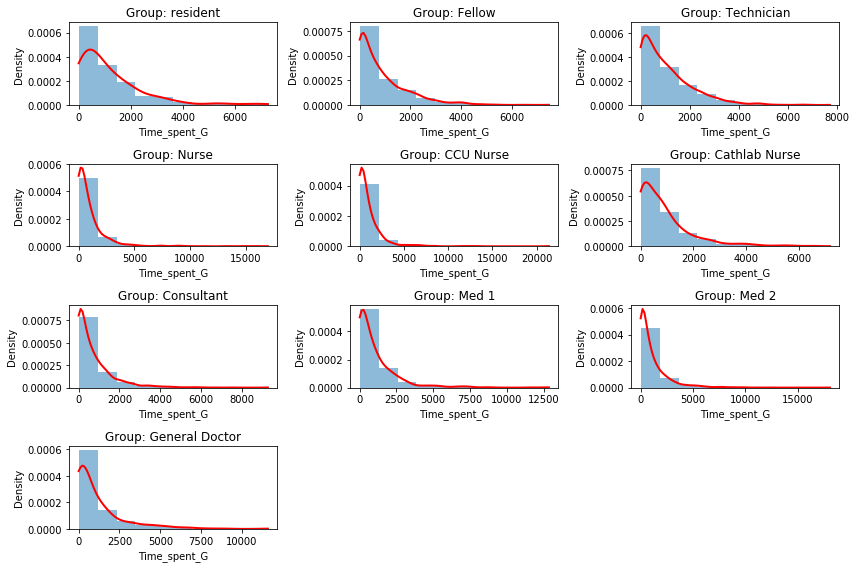

In [6]:

continuous_var = 'Time_spent_G'  #  continuous variable name
group_var = 'Group'  # R categorical variable for grouping

# Getting unique groups
groups = grid_ds1[group_var].unique()

# Creating separate histograms with distribution curves for each group arranged in a grid
num_groups = len(groups)
cols = 3  # Number of columns in the grid
rows = -(-num_groups // cols)  # Computing the number of rows needed

fig, axes = plt.subplots(rows, cols, figsize=(12, 8))

for i, group in enumerate(groups):
    group_data = grid_ds1[grid_ds1[group_var] == group][continuous_var].dropna()
    row = i // cols
    col = i % cols
    
    # Plotting histograms
    axes[row, col].hist(group_data, bins=10, density=True, alpha=0.5)
    axes[row, col].set_title(f'Group: {group}')
    axes[row, col].set_xlabel(continuous_var)
    axes[row, col].set_ylabel('Density')

    # Computing and plotting distribution curve using kernel density estimation (KDE)
    kde = gaussian_kde(group_data)
    x_vals = group_data.min(), group_data.max()
    x = np.linspace(x_vals[0], x_vals[1], 100)
    axes[row, col].plot(x, kde(x), 'r-', lw=2)

# Hiding empty subplot(s) if the number of groups doesn't fill the grid
for i in range(num_groups, rows * cols):
    row = i // cols
    col = i % cols
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()


In [14]:
grid_ds = grid_ds1
grid_ds[numerical_cols] = grid_ds1[numerical_cols].fillna(grid_ds[numerical_cols].mean())

#### Histogram of Time_Spent_G  by Group After Imputation

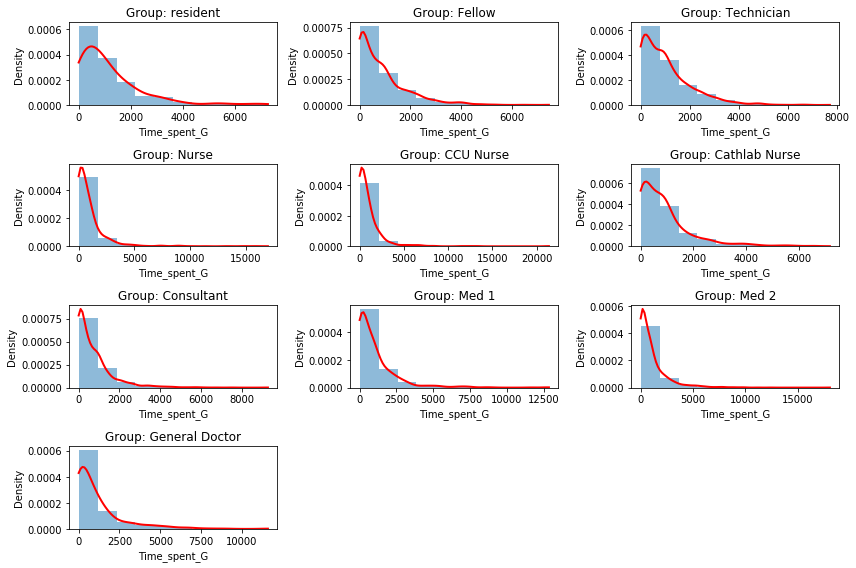

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import numpy as np

# Assuming your DataFrame is named 'grid_ds' and contains 'Time_spent_G' and 'Group' columns
# Replace 'grid_ds' with the actual name of your DataFrame

continuous_var = 'Time_spent_G'  # Replace with your actual continuous variable name
group_var = 'Group'  # Replace with your categorical variable for grouping

# Getting unique groups
groups = grid_ds[group_var].unique()

# Creating separate histograms with distribution curves for each group arranged in a grid
num_groups = len(groups)
cols = 3  # Number of columns in the grid
rows = -(-num_groups // cols)  # Computing the number of rows needed

fig, axes = plt.subplots(rows, cols, figsize=(12, 8))

for i, group in enumerate(groups):
    group_data = grid_ds[grid_ds[group_var] == group][continuous_var].dropna()
    row = i // cols
    col = i % cols
    
    # Plotting histograms
    axes[row, col].hist(group_data, bins=10, density=True, alpha=0.5)
    axes[row, col].set_title(f'Group: {group}')
    axes[row, col].set_xlabel(continuous_var)
    axes[row, col].set_ylabel('Density')

    # Computing and plotting distribution curve using kernel density estimation (KDE)
    kde = gaussian_kde(group_data)
    x_vals = group_data.min(), group_data.max()
    x = np.linspace(x_vals[0], x_vals[1], 100)
    axes[row, col].plot(x, kde(x), 'r-', lw=2)

# Hiding empty subplot(s) if the number of groups doesn't fill the grid
for i in range(num_groups, rows * cols):
    row = i // cols
    col = i % cols
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()


### Handling zero age values

In [16]:
grid_ds1['Age'].mean()

31.793650793650794

In [17]:
grid_ds1['Age'].median()

32.0

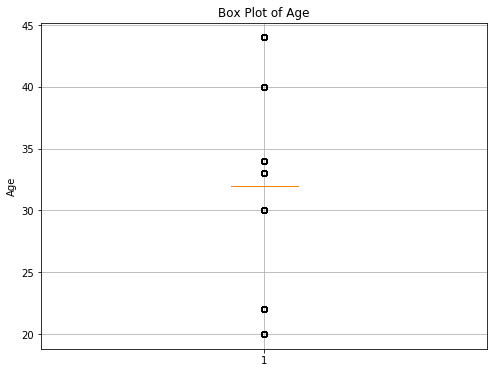

In [18]:
# Extracting the 'Age' column for the box plot
age_data = grid_ds1['Age']

# Creating the box plot
plt.figure(figsize=(8, 6))
plt.boxplot(age_data, patch_artist=True, showfliers=True)
plt.title('Box Plot of Age')
plt.ylabel('Age')
plt.grid(True)
plt.show()


In [19]:
# Filling the null values with median and mean values respectively 
median_age = grid_ds1[grid_ds1['Age']!=0]['Age'].median()
grid_ds['Age'] = grid_ds1['Age'].replace(0, median_age)

### Encoding the categorical variables and Scaling the continuous variables

In [20]:
object_cols = [ 'Respondent_Name', 'Gender', 'Group', 'Type', 'Label', 'ParentStimulus','Revisit_G_Revisitors', 'Revisit_G_Visitors', 'Revisit_F_Revisitors', 'Revisit_F_Visitors']
grid_ds[object_cols] = grid_ds[object_cols].fillna(grid_ds[object_cols].mode().iloc[0])

label_encoders = {}
for col in object_cols:
    label_encoders[col] = LabelEncoder()
    grid_ds[col] = label_encoders[col].fit_transform(grid_ds[col])
continuous_cols = ['Duration', 'Start', 'Time_spent_G', 'Time_spent_F','Revisit_G_Revisits', 'Revisit_F_Revisits','Fixations_Count', 'First_Fixation_Duration', 'Average_Fixations_Duration', 'Mouse_Clicks']

scaler = StandardScaler()

grid_ds[continuous_cols] = scaler.fit_transform(grid_ds[continuous_cols])


### Correlation

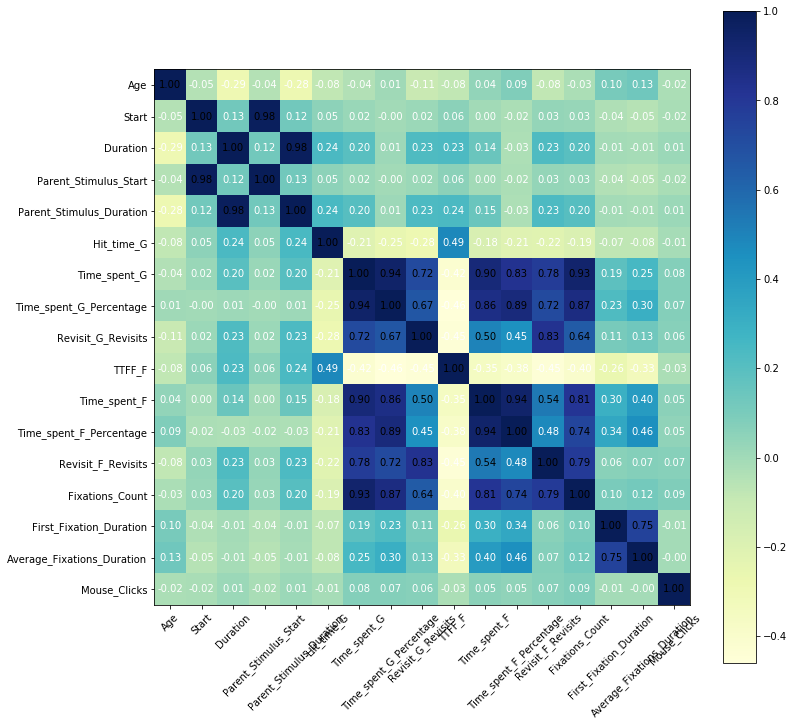

In [21]:
columns = grid_ds.columns 
cm = np.corrcoef(grid_ds[numerical_cols].values.T) # Calculating Pearson correlation
hm = heatmap(cm, figsize=(12,12), row_names=numerical_cols, column_names=numerical_cols, cmap="YlGnBu") #Representing correlation by a heat map
plt.show()

## Objective 2: Use a regression model to predict the time spent on each AOI (Time_spent_G) based on the practitioner's group (Group) and other features.

Target Variable : Time_spent_G

In [22]:
# Features are selected based on the correlation values
important_cols = ['Time_spent_F', 'Revisit_G_Revisitors', 'Revisit_G_Visitors', 'Revisit_G_Revisits', 'Revisit_F_Revisitors', 'Revisit_F_Visitors', 'Revisit_F_Revisits', 'Fixations_Count', 'Label','Group']

X = grid_ds[important_cols]
y = grid_ds['Time_spent_G']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Linear regression
linear_reg = LinearRegression()

# Train the classifier on the training data
linear_reg.fit(X_train, y_train)

# Make predictions on the test data
y_pred_test = linear_reg.predict(X_test)
y_pred_train = linear_reg.predict(X_train)

# Evaluate the model
print("Linear Regression Test:")
print(r2_score(y_test, y_pred_test))
print("Linear Regression Train:")
print(r2_score(y_train, y_pred_train))

Linear Regression Test:
0.9621414922976329
Linear Regression Train:
0.9594111101795004


In [23]:
# Checking for multicollinearity as we have identified this issue from the correlation matrix

# Fit a linear regression model
model = sm.OLS(y_train, X_train).fit()

# Calculate VIF for each feature
vif = pd.DataFrame()
vif["Features"] = X_train.columns
vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

print(vif)


               Features        VIF
0          Time_spent_F   3.441612
1  Revisit_G_Revisitors   8.343072
2    Revisit_G_Visitors  16.049984
3    Revisit_G_Revisits   4.476204
4  Revisit_F_Revisitors   9.210725
5    Revisit_F_Visitors  16.569718
6    Revisit_F_Revisits   6.427497
7       Fixations_Count   6.313445
8                 Label   2.964230
9                 Group   3.148968


<b> multicollinearity is observed as the VIF scores are greater than 5. Using random forest for fetaure selection and from the understanding of data and sepcific problem, selecting features for further analysis</b>


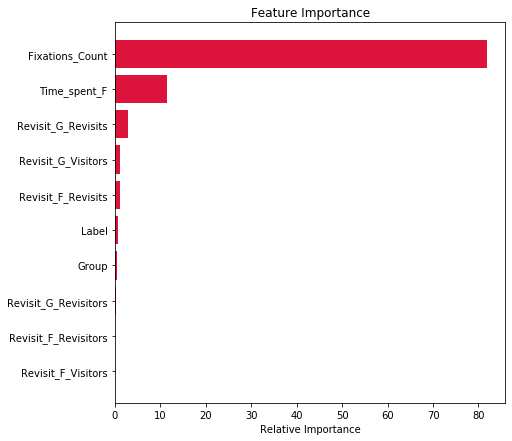

In [24]:
# Initialize the Random Forest Classifier
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_reg.fit(X, y)

# Calculating the feature importance

feature_importance = rf_reg.feature_importances_
feature_importance = 100.0*(feature_importance/np.sum(feature_importance))

# Displaying the relative feature importance by a horizontal bar chart

sorted_idx = np.argsort(feature_importance)
pos=np.arange(sorted_idx.shape[0])+0.5
plt.figure(figsize=(7, 7))
column_names = grid_ds[important_cols].columns
plt.title("Feature Importance")
plt.xlabel('Relative Importance')
plt.barh(pos, feature_importance[sorted_idx], color='crimson', align="center")
# Now use the column names in plt.yticks
plt.yticks(pos, column_names[sorted_idx])

plt.show()

<b> Peforming linear regression with selected features </b>

In [25]:
modified_cols = ['Time_spent_F','Revisit_G_Revisits','Revisit_F_Revisits','Fixations_Count','Label','Group']
# Assuming 'X' contains the features and 'y' contains the target variable 'Group'
X_n = grid_ds[modified_cols]
y_n = grid_ds['Time_spent_G']

# Split the data into training and testing sets
Xn_train, Xn_test, yn_train, yn_test = train_test_split(X_n, y_n, test_size=0.3, random_state=42)
# Initialize the Random Forest Classifier
linear_reg = LinearRegression()

# Train the classifier on the training data
linear_reg.fit(Xn_train, yn_train)

# Make predictions on the test data
y_pred_test = linear_reg.predict(Xn_test)
y_pred_train = linear_reg.predict(Xn_train)

print("Linear Regression Test:")
print("r2_score",r2_score(yn_test, y_pred_test))
print("mean square error",mean_squared_error(yn_test, y_pred_test))
print("Linear Regression Train:")
print("r2_score",r2_score(yn_train, y_pred_train))
print("mean square error",mean_squared_error(yn_train, y_pred_train))

Linear Regression Test:
r2_score 0.9608012816009713
mean square error 0.04049803451582051
Linear Regression Train:
r2_score 0.9571839456607175
mean square error 0.04220436113433931


#### From the below stats it is observed that all the features are contributing to the data(p-value<0) and multicollinearity is handled by careful selection of features

In [26]:
# Importing the statsmodels api

import statsmodels.api as sm
X_n_train = sm.add_constant(Xn_train)     # Creating the bias term omega_0
model = sm.OLS(yn_train, X_n_train)       # Defining model and the data into the model
results = model.fit()                   # Fitting the data into the model

print('Summary:\n', results.summary())  # Printing the summary of results

Summary:
                             OLS Regression Results                            
Dep. Variable:           Time_spent_G   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                 4.007e+04
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        14:54:11   Log-Likelihood:                 1761.2
No. Observations:               10760   AIC:                            -3508.
Df Residuals:                   10753   BIC:                            -3457.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0

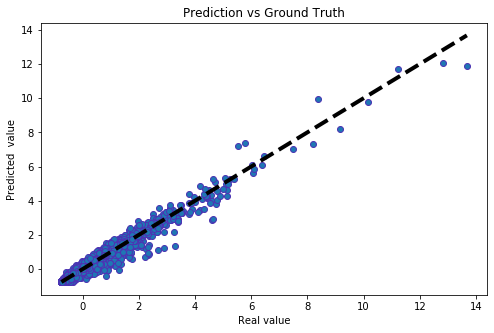

In [27]:
#Plot
fig, ax = plt.subplots(figsize=(8,5))

ax.scatter(yn_test, y_pred_test, edgecolors=(0.3, 0.2, 0.7))  # Scatter plot for predictions vs truth
ax.plot([yn_test.min(), yn_test.max()], [yn_test.min(), yn_test.max()], 'k--', lw=4)  # Draw line y=x

ax.set_xlabel('Real value')
ax.set_ylabel('Predicted  value')
plt.title('Prediction vs Ground Truth', fontdict=None, loc='center')
plt.show()

In [28]:
# Initialize the Random Forest Classifier
rf_reg = RandomForestRegressor(n_estimators=200,random_state=42)

# Train the classifier on the training data
rf_reg.fit(Xn_train, yn_train)

# Make predictions on the test data
y_pred_test = rf_reg.predict(Xn_test)
y_pred_train = rf_reg.predict(Xn_train)

# Evaluate the model
print("Random Forest Regression Test:")
print("r2_score",r2_score(yn_test, y_pred_test))
print("mean square error",mean_squared_error(yn_test, y_pred_test))
print("Random Forest Regression Train:")
print("r2_score",r2_score(yn_train, y_pred_train))
print("mean square error",mean_squared_error(yn_train, y_pred_train))

Random Forest Regression Test:
r2_score 0.9717195328763434
mean square error 0.029217877024411903
Random Forest Regression Train:
r2_score 0.9948324560557861
mean square error 0.0050937176291622885


<span style="color:green; font-weight:bold">Both Linear Regression and Random Forest Regression are performing well. Although Random Forest is potentially prone to overfitting due to its ability to capture complex patterns in the data, both models exhibit strong performance.
 </span>

## Objective 3: What individual characteristics predict whether a participant will revisit a AOI?

Target Variable : Revisit_G_Visitors

If the value of Revisit-G is 0, it means that the participant did not revisit the grid-based AOI after their initial visit.

If the value of Revisit-G is 1, it means that the participant revisited the grid-based AOI at least once after their initial visit.


In [29]:
class_counts = grid_ds['Group'].value_counts()
print("Counts of each class and its labels:")
print(class_counts)

Counts of each class and its labels:
6    2684
3    2440
8    2440
2    2196
7    1464
1    1464
5    1220
0     732
4     488
9     244
Name: Group, dtype: int64


C:\Users\aslam\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


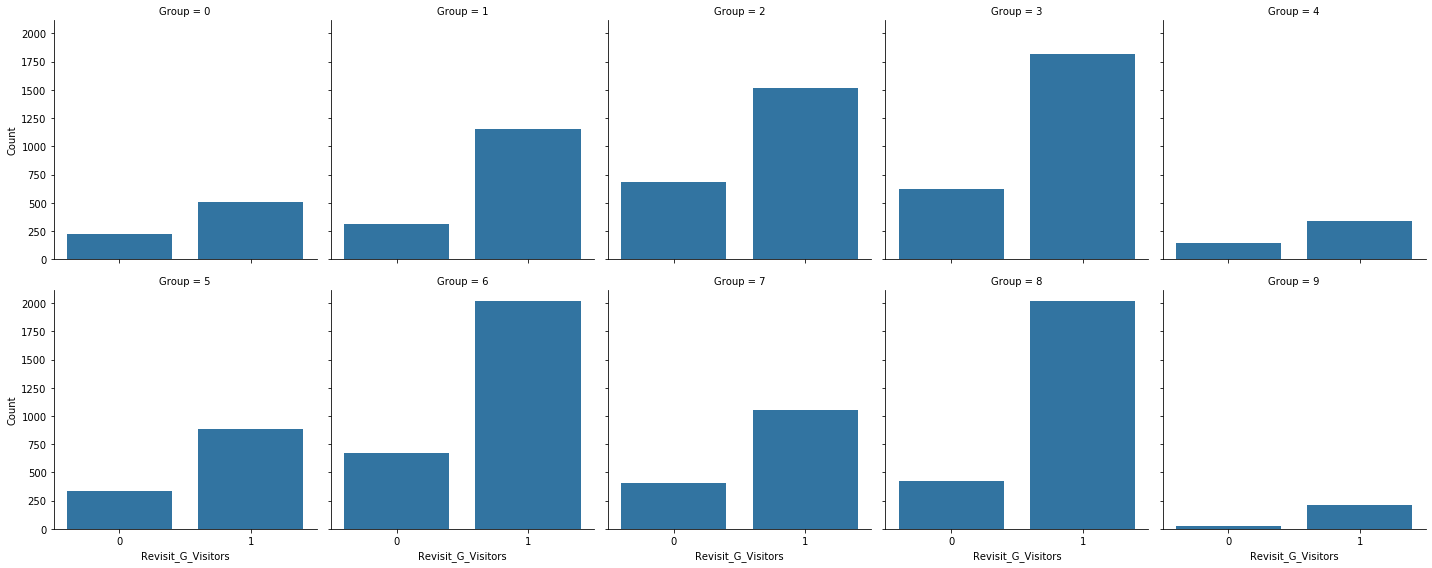

In [30]:
# Create a FacetGrid with 3 rows and 3 columns
g = sns.FacetGrid(grid_ds, col='Group', col_wrap=5, height=4)

# Map a count plot onto the grid for each group class
g.map(sns.countplot, 'Revisit_G_Visitors')

# Set titles and labels
g.set_xlabels('Revisit_G_Visitors')
g.set_ylabels('Count')

plt.tight_layout()
plt.show()

### This is binary unbalanced classification problem

In [31]:
class_counts = grid_ds['Revisit_G_Visitors'].value_counts()
print("Counts of each class and its labels:")
print(class_counts)

Counts of each class and its labels:
1    11524
0     3848
Name: Revisit_G_Visitors, dtype: int64


#### Performing Chi-Square test for checking the assosciation between Group and target variable [Revisit_G_Visitors].

In [32]:
contingency_table = pd.crosstab(grid_ds['Group'], grid_ds['Revisit_G_Visitors'])

# Performing the chi-square test
chi2, p_val, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square value for group: {chi2}")
print(f"P-value: {p_val}")
print(f"Degrees of freedom: {dof}")

Chi-square value for group: 178.87251928149624
P-value: 8.711954759202795e-34
Degrees of freedom: 9


#### Performing Chi-Square test for checking the assosciation between ParentStimulus and target variable [Revisit_G_Visitors].

In [33]:
# Assuming 'Group' and 'Revisiting' are the actual column names in your dataset
contingency_table = pd.crosstab(grid_ds['ParentStimulus'], grid_ds['Revisit_G_Visitors'])

# Performing the chi-square test
chi2, p_val, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square value for Parent Stimulus: {chi2}")
print(f"P-value: {p_val}")
print(f"Degrees of freedom: {dof}")

Chi-square value for Parent Stimulus: 90.89836446093516
P-value: 1.0748524790900989e-15
Degrees of freedom: 9


#### Logistic regression

In [34]:
log_reg = LogisticRegression(random_state=42)

#Selected categorical variables based on chi square value and continuous variables relevant to specific problem.
important_cols1 = ['Group','Time_spent_F','Time_spent_G', 'Fixations_Count',]
#important_cols1 = ['Group','Label']
X1 = grid_ds[important_cols1]
y1 = grid_ds['Revisit_G_Visitors']

# Split the data into training and testing sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=42)

log_reg.fit(X1_train, y1_train)

print('Train report Logistic Regression\n',classification_report(y1_train,log_reg.predict(X1_train)))
print('Test report Logistic regression\n',classification_report(y1_test,log_reg.predict(X1_test)))

Train report Logistic Regression
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      2718
           1       0.99      0.97      0.98      8042

    accuracy                           0.97     10760
   macro avg       0.95      0.97      0.96     10760
weighted avg       0.97      0.97      0.97     10760

Test report Logistic regression
               precision    recall  f1-score   support

           0       0.91      0.96      0.93      1130
           1       0.99      0.97      0.98      3482

    accuracy                           0.97      4612
   macro avg       0.95      0.97      0.96      4612
weighted avg       0.97      0.97      0.97      4612



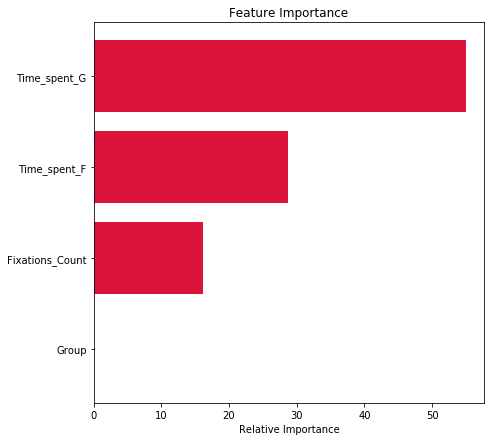

In [35]:
rf_clf = RandomForestClassifier(n_estimators=3000, max_depth=6, max_leaf_nodes=8, random_state=3)
rf_clf.fit(X1, y1)

# Calculating the feature importance

feature_importance = rf_clf.feature_importances_
feature_importance = 100.0*(feature_importance/np.sum(feature_importance))

# Displaying the relative feature importance by a horizontal bar chart

sorted_idx = np.argsort(feature_importance)
pos=np.arange(sorted_idx.shape[0])+0.5
plt.figure(figsize=(7, 7))
column_names = grid_ds[important_cols1].columns
plt.title("Feature Importance")
plt.xlabel('Relative Importance')
plt.barh(pos, feature_importance[sorted_idx], color='crimson', align="center")
# Now use the column names in plt.yticks
plt.yticks(pos, column_names[sorted_idx])

plt.show()

In [36]:
# Load your Logistic Regression model object
model = sm.Logit(y1, X1).fit()

# Get and print the model summary
summary = model.summary()
print(summary)

Optimization terminated successfully.
         Current function value: 0.378200
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:     Revisit_G_Visitors   No. Observations:                15372
Model:                          Logit   Df Residuals:                    15368
Method:                           MLE   Df Model:                            3
Date:                Wed, 13 Dec 2023   Pseudo R-squ.:                  0.3279
Time:                        14:54:39   Log-Likelihood:                -5813.7
converged:                       True   LL-Null:                       -8649.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Group               0.4639      0.008     55.948      0.000       0.448       0.480
Time_spent_F  

From the above stats and feature importance all the features are contributing to the model and below interpreatations can be made.

<span style="color:red; font-weight:bold"> Interpretations : </span>


<span style="color:green; font-weight:bold">
    
    
The longer participants spend gazing at a specific AOI (Area of Interest), the more likely they are to revisit it. 

A higher number of fixations on an AOI decreases the probability of revisiting. 

Similar to fixations, a longer total fixation time on an AOI decreases the probability of revisiting. </span>

#### SVM Classifier

In [37]:
svm_clf = svm.SVC(kernel='rbf', gamma='auto', C=10)
svm_clf.fit(X1_train, y1_train)              # Fit the train data
y_tr_pred = svm_clf.predict(X1_train)    # Predict the target for train data
y_ts_pred = svm_clf.predict(X1_test)    # Predict the target for test data
tr_score = metrics.f1_score(y1_train, y_tr_pred)  # Compute train accuracy
ts_score = metrics.f1_score(y1_test, y_ts_pred)  # Compute test accuracy
tr_report = classification_report(y1_train, y_tr_pred)  # Generate classification report for train data
ts_report = classification_report(y1_test, y_ts_pred)  # Generate classification report for test data
print('Train Classification Report: \n\n', tr_report,'\n\n')
print('Test Classification Report: \n\n', ts_report)

Train Classification Report: 

               precision    recall  f1-score   support

           0       0.94      0.95      0.95      2718
           1       0.98      0.98      0.98      8042

    accuracy                           0.97     10760
   macro avg       0.96      0.97      0.96     10760
weighted avg       0.97      0.97      0.97     10760
 


Test Classification Report: 

               precision    recall  f1-score   support

           0       0.93      0.95      0.94      1130
           1       0.98      0.98      0.98      3482

    accuracy                           0.97      4612
   macro avg       0.96      0.96      0.96      4612
weighted avg       0.97      0.97      0.97      4612



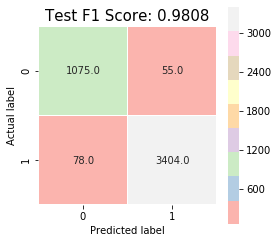

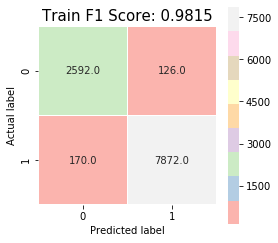

In [38]:
test_c_matrix = confusion_matrix(y1_test, y_ts_pred)  # Compute the test confusion matrix

plt.figure(figsize=(4,4))
sns.heatmap(test_c_matrix, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Pastel1');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Test F1 Score: {0}'.format(round(ts_score, 4))
plt.title(all_sample_title, size = 15);
plt.show()
# Computing the confusion matrix for the test subset

train_c_matrix = confusion_matrix(y1_train, y_tr_pred)  # Compute the test confusion matrix

plt.figure(figsize=(4,4))
sns.heatmap(train_c_matrix, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Pastel1');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Train F1 Score: {0}'.format(round(tr_score, 4))
plt.title(all_sample_title, size = 15);
plt.show()

<b> To handle false positives and false negatives is equally important for this specific problem. So, considering F1 score as a deciding factor for model performance.
    
 <span style="color:green; font-weight:bold"> Both Logistic regression and SVM performed well for the problem exhibiting robust F1-scores across Classes 0 and 1, maintaining a strong balance between precision and recall on the train and test sets.</span>